In [4]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from wordcloud import wordcloud
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.util import bigrams,trigrams,ngrams
from nltk.corpus import stopwords
from cleantext import clean
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Scrapping the data from Amazon website

In [51]:
def review_Link(url,page):
    Review =[]
    for pa in range(0,page+1):
        if pa == 1:
            website_reviews = rq.get(url = url)
            website_data = website_reviews.text
            data = BeautifulSoup(website_data,"html.parser")
            for i in data.find_all("div",{"class":"a-section review aok-relative"}):
                Review_title = i.find("a", {"data-hook":"review-title"}).text.strip()
                Star_rating = i.find("i", {"data-hook":"review-star-rating"}).text.strip()[0:3]
                reviewdate = i.find("span", {"data-hook":"review-date"}).text.strip()
                Bodytags = i.find("span", {"class":"a-size-base review-text review-text-content"}).text.strip()
                dic = {"Review_title": Review_title ,"Date": reviewdate,"Body" : Bodytags,"Star_rating": Star_rating}
                Review.append(dic)
        else:
            url = url.split('ref')
            url = url[0] 
            Url = f"{url}ref=cm_cr_getr_d_paging_btm_next_{pa}?ie=UTF8&reviewerType=all_reviews&pageNumber={pa}"
            website_reviews = rq.get(url = Url)
            website_data = website_reviews.text
            data = BeautifulSoup(website_data,"html.parser")
            for i in data.find_all("div",{"class":"a-section review aok-relative"}):
                Review_title = i.find("a", {"data-hook":"review-title"}).text.strip()
                Star_rating = i.find("i", {"data-hook":"review-star-rating"}).text.strip()[0:3]
                reviewdate = i.find("span", {"data-hook":"review-date"}).text.strip()
                Bodytags = i.find("span", {"class":"a-size-base review-text review-text-content"}).text.strip()
                dic = {"Review_title": Review_title ,"Date": reviewdate,"Body" : Bodytags,"Star_rating": Star_rating}
                Review.append(dic)  
    df = pd.DataFrame(Review)
    df.to_csv("F:/datascientist/DATA/Boat_smart_watch.csv",index=False)

In [52]:
review_Link("https://www.amazon.in/boAt-Wave-Call-Dedicated-Multi-Sport/product-reviews/B0B5B6PQCT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews",235)

In [5]:
df = pd.read_csv("F:/datascientist/DATA/Boat_smart_watch.csv")

In [6]:
df

,Review_title,Date,Body,Star_rating,Comments
0,Not Polished Enough. (Improving with updates),Reviewed in India 🇮🇳 on 23 September 2022,[Update: Sept 29] boAt seems to have heard the...,4,1.0
1,Nice watch,Reviewed in India 🇮🇳 on 24 October 2022,the watch was delivered on time. I am very hap...,4,1.0
2,Very good product ❤️❤️,Reviewed in India 🇮🇳 on 26 October 2022,A) The feel is very good. It is superlight in ...,4,1.0
3,Battery drains within 2 days......,Reviewed in India 🇮🇳 on 27 October 2022,Pros. 1. Touch is awesome 2. Variety of watch...,4,0.0
4,Overall decent watch,Reviewed in India 🇮🇳 on 24 October 2022,"I got this for 1700 y all, it was worth it con...",4,1.0
...,...,...,...,...,...
1182,Delightful,Reviewed in India 🇮🇳 on 25 October 2022,"A beautiful watch, very functional with Heart ...",5,NaN
1183,Great product,Reviewed in India 🇮🇳 on 28 October 2022,This watch has been just what I expected so fa...,5,NaN
1184,WATCH WITH GREAT FEATURES,Reviewed in India 🇮🇳 on 28 October 2022,"I love it ,love it , love it ! It's a great qu...",5,NaN
1185,Outstanding,Reviewed in India 🇮🇳 on 30 October 2022,The watch is best and echonomical friendly. Go...,5,NaN


### To train our model Positive and negtive comments has been manually splited for 300 comments 

In [141]:
df = pd.read_csv("F:/main proj/Customer sentiment analysis/Train_boat_smart_watch.csv")

In [142]:
df

,Review_title,Date,Body,Star_rating,Comments
0,Not Polished Enough. (Improving with updates),Reviewed in India 🇮🇳 on 23 September 2022,[Update: Sept 29] boAt seems to have heard the...,4,1
1,Nice watch,Reviewed in India 🇮🇳 on 24 October 2022,the watch was delivered on time. I am very hap...,4,1
2,Very good product ❤️❤️,Reviewed in India 🇮🇳 on 26 October 2022,A) The feel is very good. It is superlight in ...,4,1
3,Battery drains within 2 days......,Reviewed in India 🇮🇳 on 27 October 2022,Pros. 1. Touch is awesome 2. Variety of watch...,4,1
4,Overall decent watch,Reviewed in India 🇮🇳 on 24 October 2022,"I got this for 1700 y all, it was worth it con...",4,1
...,...,...,...,...,...
296,Loved this watch,Reviewed in India 🇮🇳 on 30 October 2022,Bought this instead of a fitbit due to my work...,5,1
297,Awesome smartwatch😘,Reviewed in India 🇮🇳 on 29 October 2022,Good battery life.....Good design.....Very goo...,5,1
298,Most advanced watch in such an affordable price.,Reviewed in India 🇮🇳 on 25 October 2022,This watch got some serious skills. It is comf...,5,1
299,Battery Backup,Reviewed in India 🇮🇳 on 26 July 2022,1. Battery backup is not up to mark...it hardl...,3,0


In [145]:
df

,Review_title,Date,Body,Star_rating,Comments
0,Not Polished Enough. (Improving with updates),Reviewed in India 🇮🇳 on 23 September 2022,[Update: Sept 29] boAt seems to have heard the...,4,1
1,Nice watch,Reviewed in India 🇮🇳 on 24 October 2022,the watch was delivered on time. I am very hap...,4,1
2,Very good product ❤️❤️,Reviewed in India 🇮🇳 on 26 October 2022,A) The feel is very good. It is superlight in ...,4,1
3,Battery drains within 2 days......,Reviewed in India 🇮🇳 on 27 October 2022,Pros. 1. Touch is awesome 2. Variety of watch...,4,1
4,Overall decent watch,Reviewed in India 🇮🇳 on 24 October 2022,"I got this for 1700 y all, it was worth it con...",4,1
...,...,...,...,...,...
296,Loved this watch,Reviewed in India 🇮🇳 on 30 October 2022,Bought this instead of a fitbit due to my work...,5,1
297,Awesome smartwatch😘,Reviewed in India 🇮🇳 on 29 October 2022,Good battery life.....Good design.....Very goo...,5,1
298,Most advanced watch in such an affordable price.,Reviewed in India 🇮🇳 on 25 October 2022,This watch got some serious skills. It is comf...,5,1
299,Battery Backup,Reviewed in India 🇮🇳 on 26 July 2022,1. Battery backup is not up to mark...it hardl...,3,0


In [146]:
df = df[['Body', 'Comments']]

In [147]:
df

,Body,Comments
0,[Update: Sept 29] boAt seems to have heard the...,1
1,the watch was delivered on time. I am very hap...,1
2,A) The feel is very good. It is superlight in ...,1
3,Pros. 1. Touch is awesome 2. Variety of watch...,1
4,"I got this for 1700 y all, it was worth it con...",1
...,...,...
296,Bought this instead of a fitbit due to my work...,1
297,Good battery life.....Good design.....Very goo...,1
298,This watch got some serious skills. It is comf...,1
299,1. Battery backup is not up to mark...it hardl...,0


In [148]:
df.Body.info()

<class 'pandas.core.series.Series'>
RangeIndex: 301 entries, 0 to 300
Series name: Body
Non-Null Count  Dtype 
--------------  ----- 
287 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


# Data Processing

In [149]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
df["Body"] = df["Body"].astype("str")

C:\Users\user\AppData\Local\Temp\ipykernel_14116\1876889663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Body"] = df["Body"].astype("str")


In [151]:
df

,Body,Comments
0,[Update: Sept 29] boAt seems to have heard the...,1
1,the watch was delivered on time. I am very hap...,1
2,A) The feel is very good. It is superlight in ...,1
3,Pros. 1. Touch is awesome 2. Variety of watch...,1
4,"I got this for 1700 y all, it was worth it con...",1
...,...,...
296,Bought this instead of a fitbit due to my work...,1
297,Good battery life.....Good design.....Very goo...,1
298,This watch got some serious skills. It is comf...,1
299,1. Battery backup is not up to mark...it hardl...,0


In [152]:
corpus=[]

for i in range(0, 301):
    review = re.sub('[^a-zA-Z]', ' ', df['Body'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [153]:
corpus

['updat sept boat seem heard feedback updat watch face good one pick slight improv one watch earlier bit impress ad one star not polish product font tacki look ugli watch notif text caller name text watch face lazi design job point watch face good usabl rest useless updat oct boat seem smartwatch launch spree thank constantli updat phone app watch face mani good look watch face choos overal still smartwatch ui need work atleast good watch face good screen qualiti batteri life look metal frame call clariti bt call price reason accur sensorsbad ui font ugli tacki could tri give chines softwar makeov clearli lazi job tech team copi past job precis get outsourc softwar plaster brand logo restart randomli call go watch even min watch face job design tech ui team boat good team design ui guy realli offer simpl yet good softwar featur like good watch face good watch ui option silenc call repli quick repli look nois smart watch rang nois colorfit puls go buzz cheaper better altern better watch

# Now data is been processed

# Data Processing

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [155]:
cv

CountVectorizer(max_features=1500)

In [156]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [157]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [159]:
import pickle
bow_path = 'Boat_smart_watch_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# Model Building

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 0)

In [161]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=1,n_estimators=300,class_weight='balanced',criterion='gini',
                    min_samples_leaf=5,
                       min_samples_split=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=300, random_state=1)

In [162]:
import joblib
joblib.dump(classifier, 'boat_smart_watch_Classifier_Sentiment_Model')

['boat_smart_watch_Classifier_Sentiment_Model']

In [163]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model=RandomForestClassifier(random_state=1,n_estimators=300,class_weight='balanced',criterion='gini',
                    min_samples_leaf=5,
                       min_samples_split=10)
RandomForest_model.fit(X_train,y_train)
Ran_accuracy=RandomForest_model.score(X_test,y_test)
accuracy1 =RandomForest_model.score(X_train,y_train) 
print(Ran_accuracy,accuracy1)

0.7540983606557377 0.8791666666666667


# Testing with new data

In [176]:
#Importing traing dataset
df = pd.read_csv("F:\main proj\Customer sentiment analysis/Test_boat_smart_watch.csv")

In [177]:
test_df=df[["Body","Comments"]]

In [178]:
test_df

,Body,Comments
0,Over all a very good tracker. Good battery bac...,NaN
1,Awesome purchase. Worth it. Theme and the look...,NaN
2,"Ovaral ok but , manual image to wallpaper uplo...",NaN
3,The app companion and the overall functionally...,NaN
4,"Best watch in the segment , but my device was ...",NaN
...,...,...
881,"A beautiful watch, very functional with Heart ...",NaN
882,This watch has been just what I expected so fa...,NaN
883,"I love it ,love it , love it ! It's a great qu...",NaN
884,The watch is best and echonomical friendly. Go...,NaN


In [167]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
test_df['Body'] = test_df['Body'].astype("str")

C:\Users\user\AppData\Local\Temp\ipykernel_14116\381278362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Body'] = test_df['Body'].astype("str")


In [180]:
test_df

,Body,Comments
0,Over all a very good tracker. Good battery bac...,NaN
1,Awesome purchase. Worth it. Theme and the look...,NaN
2,"Ovaral ok but , manual image to wallpaper uplo...",NaN
3,The app companion and the overall functionally...,NaN
4,"Best watch in the segment , but my device was ...",NaN
...,...,...
881,"A beautiful watch, very functional with Heart ...",NaN
882,This watch has been just what I expected so fa...,NaN
883,"I love it ,love it , love it ! It's a great qu...",NaN
884,The watch is best and echonomical friendly. Go...,NaN


In [181]:
corpus=[]

for i in range(0,886):
    review = re.sub('[^a-zA-Z]', ' ', test_df['Body'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [182]:
corpus

['good tracker good batteri back day light comfort',
 'awesom purchas worth theme look classi',
 'ovar ok manual imag wallpap upload time take min much take time',
 'app companion overal function good smart watch notif iphon sent watch promptli',
 'best watch segment devic batteri drain issu replac receiv yet',
 'smart watch realli smart accur fulli happi product',
 'great product pricei bought sleep trackinglov',
 'watch great far everyth advert love track step heart rate bp sat sleep also connect phone get notif',
 'almost perfect display great design also good size perfect wrist love watch',
 'work well good product far',
 'good product',
 'take watch use',
 'realli impress not qualiti pictur realiti anoth lcd screen watch not best amol realli impress watch face need sport mode gym give one scratch guard strap realli good',
 'nice product price rangeattract design long batteri likeveri satisfi product',
 'everyth expens product half price',
 'batteri consumpt faster use call option 

In [183]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='Boat_smart_watch_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))

In [184]:
X_fresh = cv.transform(corpus).toarray()

In [185]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(886, 978)

In [186]:
import joblib
classifier = joblib.load('boat_smart_watch_Classifier_Sentiment_Model')

In [187]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 

In [188]:
y_pred.shape

(886,)

In [189]:
test_df

,Body,Comments
0,Over all a very good tracker. Good battery bac...,NaN
1,Awesome purchase. Worth it. Theme and the look...,NaN
2,"Ovaral ok but , manual image to wallpaper uplo...",NaN
3,The app companion and the overall functionally...,NaN
4,"Best watch in the segment , but my device was ...",NaN
...,...,...
881,"A beautiful watch, very functional with Heart ...",NaN
882,This watch has been just what I expected so fa...,NaN
883,"I love it ,love it , love it ! It's a great qu...",NaN
884,The watch is best and echonomical friendly. Go...,NaN


In [190]:
test_df['predicted_label'] = y_pred.tolist()
test_df

C:\Users\user\AppData\Local\Temp\ipykernel_14116\412624436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_label'] = y_pred.tolist()


,Body,Comments,predicted_label
0,Over all a very good tracker. Good battery bac...,NaN,1
1,Awesome purchase. Worth it. Theme and the look...,NaN,1
2,"Ovaral ok but , manual image to wallpaper uplo...",NaN,0
3,The app companion and the overall functionally...,NaN,1
4,"Best watch in the segment , but my device was ...",NaN,1
...,...,...,...
881,"A beautiful watch, very functional with Heart ...",NaN,1
882,This watch has been just what I expected so fa...,NaN,1
883,"I love it ,love it , love it ! It's a great qu...",NaN,1
884,The watch is best and echonomical friendly. Go...,NaN,1


In [192]:
test_df[25:60]

,Body,Comments,predicted_label
25,It's value for money.,NaN,1
26,Amazing watch.. I really love my new watch and...,NaN,1
27,Terrific product. Does everything I was needin...,NaN,1
28,The thing I like the most was calling from the...,NaN,1
29,I bought this watch for 1999 and for me it's a...,NaN,1
30,Arrived quick and easy to setup. Description a...,NaN,1
31,Easy to use and provides good info.,NaN,1
32,I am very satisfied with this as it is a fract...,NaN,1
33,I like this watch too much because of the grea...,NaN,1
34,Great watch! It was a gift to my dad and he lo...,NaN,1


In [52]:
test_df 

,Body,Comments,predicted_label
301,Over all a very good tracker. Good battery bac...,NaN,1.0
302,Awesome purchase. Worth it. Theme and the look...,NaN,1.0
303,"Ovaral ok but , manual image to wallpaper uplo...",NaN,0.0
304,The app companion and the overall functionally...,NaN,1.0
305,"Best watch in the segment , but my device was ...",NaN,1.0
...,...,...,...
1182,"A beautiful watch, very functional with Heart ...",NaN,1.0
1183,This watch has been just what I expected so fa...,NaN,1.0
1184,"I love it ,love it , love it ! It's a great qu...",NaN,1.0
1185,The watch is best and echonomical friendly. Go...,NaN,1.0


In [193]:
test_df 

,Body,Comments,predicted_label
0,Over all a very good tracker. Good battery bac...,NaN,1
1,Awesome purchase. Worth it. Theme and the look...,NaN,1
2,"Ovaral ok but , manual image to wallpaper uplo...",NaN,0
3,The app companion and the overall functionally...,NaN,1
4,"Best watch in the segment , but my device was ...",NaN,1
...,...,...,...
881,"A beautiful watch, very functional with Heart ...",NaN,1
882,This watch has been just what I expected so fa...,NaN,1
883,"I love it ,love it , love it ! It's a great qu...",NaN,1
884,The watch is best and echonomical friendly. Go...,NaN,1


1    625
0    261
Name: predicted_label, dtype: int64

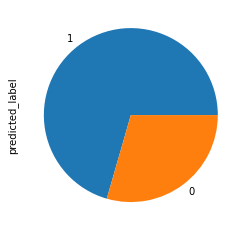

In [194]:
test_df.predicted_label.value_counts().plot(kind="pie")
test_df.predicted_label.value_counts()

In [195]:
test_df.reset_index(drop=True, inplace=True)

In [196]:
test_df = test_df.drop(["Comments"],axis=1)

In [197]:
test_df

,Body,predicted_label
0,Over all a very good tracker. Good battery bac...,1
1,Awesome purchase. Worth it. Theme and the look...,1
2,"Ovaral ok but , manual image to wallpaper uplo...",0
3,The app companion and the overall functionally...,1
4,"Best watch in the segment , but my device was ...",1
...,...,...
881,"A beautiful watch, very functional with Heart ...",1
882,This watch has been just what I expected so fa...,1
883,"I love it ,love it , love it ! It's a great qu...",1
884,The watch is best and echonomical friendly. Go...,1


In [198]:
test_df[test_df.predicted_label==1]

,Body,predicted_label
0,Over all a very good tracker. Good battery bac...,1
1,Awesome purchase. Worth it. Theme and the look...,1
3,The app companion and the overall functionally...,1
4,"Best watch in the segment , but my device was ...",1
5,This smart watch is really very smart and accu...,1
...,...,...
881,"A beautiful watch, very functional with Heart ...",1
882,This watch has been just what I expected so fa...,1
883,"I love it ,love it , love it ! It's a great qu...",1
884,The watch is best and echonomical friendly. Go...,1


In [199]:
test_df[test_df.predicted_label==0]

,Body,predicted_label
2,"Ovaral ok but , manual image to wallpaper uplo...",0
39,Battery is not good,0
57,The media could not be loaded.\n ...,0
87,Nice watch but battery not getting long time,0
95,If you connected with Bluetooth call so batter...,0
...,...,...
836,Battery back very bad,0
855,The media could not be loaded.\n ...,0
861,Battery lasts only for 2 days. Worst watch.. D...,0
870,Overall the product is good. I am satisfied w...,0


# End